# Objetivo

O projeto tem como objetivo fazer uma análise nos dados disponibilizados pelo Ministério da Saúde a respeito dos casos de Síndrome Respiratória Aguda Grave (SARS) hospitalizados no período de 2021 até julho de 2024. Vale ressaltar que estão inclusos dados a respeito dos casos de COVID-19.

Os conjuntos dos dados bem como um PDF contendo a descrição dos mesmos pode ser acessado através do link: https://dados.gov.br/dados/conjuntos-dados/srag-2021-e-2022

# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\leona\AppData\Local\Temp\ipykernel_18672\1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Inicializando Datasets

In [3]:
df_2021 = pd.read_csv("SRAG 2021 - 01-05.csv", delimiter = ';')
df_2022 = pd.read_csv("SRAG 2022 - 03-04.csv", delimiter = ';')
df_2023 = pd.read_csv("SRAG 2023 - 05-08.csv", delimiter = ';')
df_2024 = pd.read_csv("SRAG 2024 - 05-08.csv", delimiter = ';')

C:\Users\leona\AppData\Local\Temp\ipykernel_18672\3209780142.py:1: DtypeWarning: Columns (15,59,61,62,63,91,93,105,107,114,116,117,118,122,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2021 = pd.read_csv("SRAG 2021 - 01-05.csv", delimiter = ';')
C:\Users\leona\AppData\Local\Temp\ipykernel_18672\3209780142.py:2: DtypeWarning: Columns (15,53,59,61,62,63,91,93,120,122,143,171) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv("SRAG 2022 - 03-04.csv", delimiter = ';')
C:\Users\leona\AppData\Local\Temp\ipykernel_18672\3209780142.py:3: DtypeWarning: Columns (15,18,20,23,53,61,62,63,72,74,79,91,93,109,120,130,175,178) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv("SRAG 2023 - 05-08.csv", delimiter = ';')
C:\Users\leona\AppData\Local\Temp\ipykernel_18672\3209780142.py:4: DtypeWarning: Columns (15,53,93,120,171,175,178) have mixed types. Specify dtype option 

# Tratando Dados

In [4]:
print(f"Shape dataset 2021: {df_2021.shape}")
print(f"Shape dataset 2022: {df_2022.shape}")
print(f"Shape dataset 2023: {df_2023.shape}")
print(f"Shape dataset 2024: {df_2024.shape}")

Shape dataset 2021: (1731290, 166)
Shape dataset 2022: (557476, 173)
Shape dataset 2023: (279192, 190)
Shape dataset 2024: (161525, 191)


In [5]:
def drop_cols(dataframe):
    colunas_df = dataframe.columns
    colunas_drop = ["TEM_CPF", "NU_CPF", "ESTRANG", "NU_CNS", "NM_PACIENT", "DT_NASC", "CS_ETINIA", "TP_POV_CT", "PAC_COCBO", "PAC_DSCBO", "NM_MAE_PAC", "NU_CEP", "NM_BAIRRO", 
                    "NM_LOGRADO", "NU_NUMERO", "NM_COMPLEM", "NU_DDD_TEL", "NU_TELEFON", "OBES_IMC", "FNT_IN_COV", "DT_UT_DOSE", "DT_VAC_MAE", "OUT_ANTIV", "DT_ANTIVIR", 
                    "OUT_TRAT", "DT_TRT_COV", "DT_INTERNA", "RAIOX_OUT", "DT_RAIOX", "TOMO_OUT", "DT_TOMO", "DT_COLETA", "OUT_AMOST", "REQUI_GAL", "DT_RES_AN", "CO_LAB_AN", 
                    "DT_PCR", "FLUASU_OUT", "FLUBLI_OUT", "DS_PCR_OUT", "DT_CO_SOR", "OUT_SOR", "SOR_OUT", "DT_RES", "CLASSI_OUT", "DT_ENCERRA", "NU_DO", "OBSERVA", "NOME_PROF", 
                    "REG_PROF", "DT_DIGITA", "COD_IDADE", "CO_REGIONA", "CO_MUN_NOT", "CO_UNI_NOT", "CO_PAIS", "CO_RG_RESI", "CO_MUN_RES", "CO_RG_INTE", "CO_MU_INTE", "LAB_PR_COV", 
                    "DT_RT_VGM", "DT_VGM", "CO_PS_VGM", "LO_PS_VGM", "SURTO_SG", "DT_NOTIFIC", "DT_SIN_PRI", "DT_EVOLUCA"]
    
    drops = [] 
    # Algumas das colunas que queremos remover podem não estar no dataframe, então criamos um outro array para armazer as que estão em ambas as listas (colunas_df e colunas_drop) 
    # para removê-las de uma única vez
    
    for coluna in colunas_df:
        if coluna in colunas_drop:
            drops.append(coluna)

    dataframe = dataframe.drop(drops, axis = 1)

    return dataframe

In [6]:
df_2021_t = drop_cols(df_2021)
df_2022_t = drop_cols(df_2022)
df_2023_t = drop_cols(df_2023)
df_2024_t = drop_cols(df_2024)

In [7]:
del df_2021
del df_2022
del df_2023
del df_2024

In [8]:
print(f"Shape dataset 2021 tratado: {df_2021_t.shape}")
print(f"Shape dataset 2022 tratado: {df_2022_t.shape}")
print(f"Shape dataset 2023 tratado: {df_2023_t.shape}")
print(f"Shape dataset 2024 tratado: {df_2024_t.shape}")

Shape dataset 2021 tratado: (1731290, 122)
Shape dataset 2022 tratado: (557476, 127)
Shape dataset 2023 tratado: (279192, 144)
Shape dataset 2024 tratado: (161525, 145)


In [9]:
df_2021_t = df_2021_t.drop_duplicates()
df_2022_t = df_2022_t.drop_duplicates()
df_2023_t = df_2023_t.drop_duplicates()
df_2024_t = df_2024_t.drop_duplicates()

In [10]:
print(f"Shape dataset 2021 tratado: {df_2021_t.shape}")
print(f"Shape dataset 2022 tratado: {df_2022_t.shape}")
print(f"Shape dataset 2023 tratado: {df_2023_t.shape}")
print(f"Shape dataset 2024 tratado: {df_2024_t.shape}")

Shape dataset 2021 tratado: (1731231, 122)
Shape dataset 2022 tratado: (557428, 127)
Shape dataset 2023 tratado: (278911, 144)
Shape dataset 2024 tratado: (161258, 145)


Os dataframes seguem sem ter o mesmo número de colunas pelo fato de que algumas colunas são a respeito de informações que não existiam naquele ano, por exemplo, o dataframe de 2022 passa a ter como a data que o paciente recebeu a 2a dose de reforço contra a COVID-19.

Dataframes de anos posteriores contém todas as colunas presentes em dataframes de anos anteriores.

# Explorando datasets separadamente

Nessa etapa irei analisar se existe alguma coluna que não estava marcada no dicionário de dados ou se as colunas estão com outro nome, avaliando novamente se é possível limpar mais dados.

Passarei as colunas do dataset registradas pelos códigos a seguir para o Excel para continuar com a organização dos dados, usando procv é possível ver as colunas que mantiveram o mesmo nome, as que retornarem #N/D não foram encontradas na tabela original (referente ao dicionário de dados) sendo assim avaliadas individualmente nessa etapa.

Esse passo serve para novamente me ajudar a analisar as colunas e caso ache necessário remover mais algumas. Como o dataset de um ano posterior tem todas as colunas dos anos anteriores, as colunas que eu julgar que não fazem sentido para as análises serão adicionadas diretamente na função feita anteriormente que remove diversas colunas de uma única vez.

## Dados 2021

In [11]:
for coluna in df_2021_t.columns:
    print(coluna)

DT_NOTIFIC
SEM_NOT
DT_SIN_PRI
SEM_PRI
SG_UF_NOT
ID_REGIONA
ID_MUNICIP
ID_UNIDADE
CS_SEXO
NU_IDADE_N
TP_IDADE
CS_GESTANT
CS_RACA
CS_ESCOL_N
ID_PAIS
SG_UF
ID_RG_RESI
ID_MN_RESI
CS_ZONA
NOSOCOMIAL
AVE_SUINO
FEBRE
TOSSE
GARGANTA
DISPNEIA
DESC_RESP
SATURACAO
DIARREIA
VOMITO
OUTRO_SIN
OUTRO_DES
PUERPERA
FATOR_RISC
CARDIOPATI
HEMATOLOGI
SIND_DOWN
HEPATICA
ASMA
DIABETES
NEUROLOGIC
PNEUMOPATI
IMUNODEPRE
RENAL
OBESIDADE
OUT_MORBI
MORB_DESC
VACINA
MAE_VAC
M_AMAMENTA
DT_DOSEUNI
DT_1_DOSE
DT_2_DOSE
ANTIVIRAL
TP_ANTIVIR
HOSPITAL
SG_UF_INTE
ID_RG_INTE
ID_MN_INTE
UTI
DT_ENTUTI
DT_SAIDUTI
SUPORT_VEN
RAIOX_RES
AMOSTRA
TP_AMOSTRA
PCR_RESUL
POS_PCRFLU
TP_FLU_PCR
PCR_FLUASU
PCR_FLUBLI
POS_PCROUT
PCR_VSR
PCR_PARA1
PCR_PARA2
PCR_PARA3
PCR_PARA4
PCR_ADENO
PCR_METAP
PCR_BOCA
PCR_RINO
PCR_OUTRO
CLASSI_FIN
CRITERIO
EVOLUCAO
DT_EVOLUCA
HISTO_VGM
PAIS_VGM
PCR_SARS2
OUT_ANIM
DOR_ABD
FADIGA
PERD_OLFT
PERD_PALA
TOMO_RES
TP_TES_AN
RES_AN
POS_AN_FLU
TP_FLU_AN
POS_AN_OUT
AN_SARS2
AN_VSR
AN_PARA1
AN_PARA2
AN_PARA3
AN_ADE

In [12]:
df_2021_t.fillna("Não preenchido", inplace=True)

C:\Users\leona\AppData\Local\Temp\ipykernel_18672\512779062.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Não preenchido' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_2021_t.fillna("Não preenchido", inplace=True)


In [13]:
df_2021_t.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,ID_UNIDADE,CS_SEXO,NU_IDADE_N,...,VACINA_COV,DOSE_1_COV,DOSE_2_COV,DOSE_REF,FAB_COV_1,FAB_COV_2,FAB_COVREF,LOTE_REF,LOTE_1_COV,LOTE_2_COV
0,06/01/2021,1,06/01/2021,1,BA,NUCLEO REGIONAL DE SAUDE NORDESTE,ALAGOINHAS,HOSPITAL REGIONAL DANTAS BIAO,M,69,...,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
1,08/01/2021,1,03/01/2021,1,BA,NUCLEO REGIONAL DE SAUDE SUL,ITABUNA,HOSPITAL CALIXTO MIDLEJ FILHO,M,89,...,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
2,09/01/2021,1,07/01/2021,1,PR,02RS METROPOLITANA,CURITIBA,COMPLEXO HOSPITALAR DO TRABALHADOR,F,51,...,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
3,06/01/2021,1,05/01/2021,1,PR,17RS LONDRINA,LONDRINA,HCL HOSPITAL DO CANCER DE LONDRINA,M,57,...,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
4,11/01/2021,2,04/01/2021,1,RS,007 CRS,DOM PEDRITO,HOSPITAL SAO LUIZ,M,81,...,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido


## Dados 2022

In [14]:
for coluna in df_2022_t.columns:
    print(coluna)

DT_NOTIFIC
SEM_NOT
DT_SIN_PRI
SEM_PRI
SG_UF_NOT
ID_REGIONA
ID_MUNICIP
ID_UNIDADE
CS_SEXO
NU_IDADE_N
TP_IDADE
CS_GESTANT
CS_RACA
CS_ESCOL_N
ID_PAIS
SG_UF
ID_RG_RESI
ID_MN_RESI
CS_ZONA
NOSOCOMIAL
AVE_SUINO
FEBRE
TOSSE
GARGANTA
DISPNEIA
DESC_RESP
SATURACAO
DIARREIA
VOMITO
OUTRO_SIN
OUTRO_DES
PUERPERA
FATOR_RISC
CARDIOPATI
HEMATOLOGI
SIND_DOWN
HEPATICA
ASMA
DIABETES
NEUROLOGIC
PNEUMOPATI
IMUNODEPRE
RENAL
OBESIDADE
OUT_MORBI
MORB_DESC
VACINA
MAE_VAC
M_AMAMENTA
DT_DOSEUNI
DT_1_DOSE
DT_2_DOSE
ANTIVIRAL
TP_ANTIVIR
HOSPITAL
SG_UF_INTE
ID_RG_INTE
ID_MN_INTE
UTI
DT_ENTUTI
DT_SAIDUTI
SUPORT_VEN
RAIOX_RES
AMOSTRA
TP_AMOSTRA
PCR_RESUL
POS_PCRFLU
TP_FLU_PCR
PCR_FLUASU
PCR_FLUBLI
POS_PCROUT
PCR_VSR
PCR_PARA1
PCR_PARA2
PCR_PARA3
PCR_PARA4
PCR_ADENO
PCR_METAP
PCR_BOCA
PCR_RINO
PCR_OUTRO
CLASSI_FIN
CRITERIO
EVOLUCAO
DT_EVOLUCA
HISTO_VGM
PAIS_VGM
PCR_SARS2
OUT_ANIM
DOR_ABD
FADIGA
PERD_OLFT
PERD_PALA
TOMO_RES
TP_TES_AN
RES_AN
POS_AN_FLU
TP_FLU_AN
POS_AN_OUT
AN_SARS2
AN_VSR
AN_PARA1
AN_PARA2
AN_PARA3
AN_ADE

A partir dessa etapa conseguimos ver a real diferença entre os datasets, no dataset de 2021, a dose de reforço contra a COVID-19 ainda não existia por exemplo, e após a confirmação do vírus começaram a ser feitas as anotações a respeito do tratamento da mesma com o uso de antivirais.

In [15]:
for coluna in df_2022_t.columns:
    if coluna not in df_2021_t.columns:
        print(coluna)

DOSE_2REF
FAB_COVRF2
LOTE_REF2
TRAT_COV
TIPO_TRAT


In [16]:
df_2022_t.fillna("Não preenchido", inplace=True)

C:\Users\leona\AppData\Local\Temp\ipykernel_18672\1796752291.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Não preenchido' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_2022_t.fillna("Não preenchido", inplace=True)


In [17]:
df_2022_t.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,ID_UNIDADE,CS_SEXO,NU_IDADE_N,...,FAB_COV_2,FAB_COVREF,LOTE_1_COV,LOTE_2_COV,LOTE_REF,DOSE_2REF,FAB_COVRF2,LOTE_REF2,TRAT_COV,TIPO_TRAT
0,05/01/2022,1,02/01/2022,1,RJ,Não preenchido,RIO DE JANEIRO,SMS UPA 24H MAGALHAES BASTOS AP 51,M,23,...,Não preenchido,Não preenchido,202010019,210017,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
1,04/01/2022,1,03/01/2022,1,MS,NRS DE DOURADOS,DOURADOS,HOSPITAL EVANGELICO DR SRA GOLDSBY KING,F,37,...,Não preenchido,Não preenchido,FC2495,FF8844,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
2,07/01/2022,1,04/01/2022,1,GO,SAO PATRICIO,RUBIATABA,HOSPITAL MUNICIPAL DE RUBIATABA,F,33,...,Não preenchido,Não preenchido,202010031,202010031,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
3,07/01/2022,1,04/01/2022,1,GO,PIRINEUS,ANAPOLIS,HOSPITAL EVANGELICO GOIANO SA,M,76,...,Não preenchido,Não preenchido,210060,210120,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
4,07/01/2022,1,06/01/2022,1,SP,GVE XXVII SAO JOSE DOS CAMPOS,SAO JOSE DOS CAMPOS,HOSPITAL VIVALLE,F,16,...,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido


## Dados 2023

In [18]:
for coluna in df_2023_t.columns:
    print(coluna)

DT_NOTIFIC
SEM_NOT
DT_SIN_PRI
SEM_PRI
SG_UF_NOT
ID_REGIONA
ID_MUNICIP
ID_UNIDADE
CS_SEXO
NU_IDADE_N
TP_IDADE
CS_GESTANT
CS_RACA
CS_ESCOL_N
ID_PAIS
SG_UF
ID_RG_RESI
ID_MN_RESI
CS_ZONA
NOSOCOMIAL
AVE_SUINO
FEBRE
TOSSE
GARGANTA
DISPNEIA
DESC_RESP
SATURACAO
DIARREIA
VOMITO
OUTRO_SIN
OUTRO_DES
PUERPERA
FATOR_RISC
CARDIOPATI
HEMATOLOGI
SIND_DOWN
HEPATICA
ASMA
DIABETES
NEUROLOGIC
PNEUMOPATI
IMUNODEPRE
RENAL
OBESIDADE
OUT_MORBI
MORB_DESC
VACINA
MAE_VAC
M_AMAMENTA
DT_DOSEUNI
DT_1_DOSE
DT_2_DOSE
ANTIVIRAL
TP_ANTIVIR
HOSPITAL
SG_UF_INTE
ID_RG_INTE
ID_MN_INTE
UTI
DT_ENTUTI
DT_SAIDUTI
SUPORT_VEN
RAIOX_RES
AMOSTRA
TP_AMOSTRA
PCR_RESUL
POS_PCRFLU
TP_FLU_PCR
PCR_FLUASU
PCR_FLUBLI
POS_PCROUT
PCR_VSR
PCR_PARA1
PCR_PARA2
PCR_PARA3
PCR_PARA4
PCR_ADENO
PCR_METAP
PCR_BOCA
PCR_RINO
PCR_OUTRO
CLASSI_FIN
CRITERIO
EVOLUCAO
DT_EVOLUCA
HISTO_VGM
PAIS_VGM
PCR_SARS2
OUT_ANIM
DOR_ABD
FADIGA
PERD_OLFT
PERD_PALA
TOMO_RES
TP_TES_AN
RES_AN
POS_AN_FLU
TP_FLU_AN
POS_AN_OUT
AN_SARS2
AN_VSR
AN_PARA1
AN_PARA2
AN_PARA3
AN_ADE

As colunas que estão no dataset de 2023 mas não estão nos anteriores não possuem descrição no dicionário de dados e como a maioria delas são a respeito de datas ou valores marcados como nulos essas colunas também serão desconsideradas.

Como sabemos que os datasets de anos posteriores possuem todas as colunas de anos anteriores precisamos remover essas colunas tanto do dataset de 2023 como do de 2024

In [19]:
colunas_drop = []

for coluna in df_2023_t.columns:
    if coluna not in df_2022_t.columns:
        colunas_drop.append(coluna)

print(colunas_drop)

['CO_DETEC', 'VG_OMS', 'VG_OMSOUT', 'VG_LIN', 'VG_MET', 'VG_METOUT', 'VG_DTRES', 'VG_ENC', 'VG_REINF', 'REINF', 'FAB_ADIC', 'LOT_RE_BI', 'FAB_RE_BI', 'DOSE_ADIC', 'DOS_RE_BI', 'LOTE_ADIC', 'TABAG']


In [20]:
df_2023_t = df_2023_t.drop(colunas_drop, axis = 1)

In [21]:
df_2024_t = df_2024_t.drop(colunas_drop, axis = 1)

In [22]:
df_2023_t.fillna("Não preenchido", inplace=True)

C:\Users\leona\AppData\Local\Temp\ipykernel_18672\3156150768.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Não preenchido' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_2023_t.fillna("Não preenchido", inplace=True)


In [23]:
df_2023_t.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,ID_UNIDADE,CS_SEXO,NU_IDADE_N,...,FAB_COV_2,FAB_COVREF,LOTE_1_COV,LOTE_2_COV,LOTE_REF,DOSE_2REF,FAB_COVRF2,LOTE_REF2,TRAT_COV,TIPO_TRAT
0,08/02/2023,6,23/01/2023,4,RS,014 CRS,CAMPINA DAS MISSOES,POSTO DE SAUDE SEDE E PACS CAMPINA DAS MISSOES,M,81,...,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,87 - COVID-19 PFIZER - COMIRNATY,210051,210132,FG3531,07/06/2022,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,21OVCD316Z,9.0,Não preenchido
1,14/02/2023,7,13/02/2023,7,SC,FLORIANOPOLIS,FLORIANOPOLIS,INSTITUTO DE ENSINO E PESQUISA DR IRINEU MAY B...,M,76,...,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Não preenchido,210075,210132,Não preenchido,30/07/2022,87 - COVID-19 PFIZER - COMIRNATY,FP7498,Não preenchido,Não preenchido
2,24/02/2023,8,16/02/2023,7,SP,GVE I CAPITAL,SAO PAULO,BP MIRANTE,F,20,...,87 - COVID-19 PFIZER - COMIRNATY,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,FE2083,FF8844,219VCD291W,Não preenchido,Não preenchido,Não preenchido,2.0,Não preenchido
3,16/02/2023,7,04/02/2023,5,SP,GVE XXIV RIBEIRAO PRETO,CAJURU,CASA DE CARIDADE SAO VICENTE DE PAULO CAJURU,F,18,...,87 - COVID-19 PFIZER - COMIRNATY,87 - COVID-19 PFIZER - COMIRNATY,FF2591,FG3533,FT7280,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido
4,27/02/2023,9,25/02/2023,8,PR,02RS METROPOLITANA,CURITIBA,HOSPITAL UNIVERSITARIO EVANGELICO MACKENZIE,M,2,...,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,Não preenchido,2.0,Não preenchido


## Dados 2024

In [24]:
for coluna in df_2024_t.columns:
    print(coluna)

DT_NOTIFIC
SEM_NOT
DT_SIN_PRI
SEM_PRI
SG_UF_NOT
ID_REGIONA
ID_MUNICIP
ID_UNIDADE
CS_SEXO
NU_IDADE_N
TP_IDADE
CS_GESTANT
CS_RACA
CS_ESCOL_N
ID_PAIS
SG_UF
ID_RG_RESI
ID_MN_RESI
CS_ZONA
NOSOCOMIAL
AVE_SUINO
FEBRE
TOSSE
GARGANTA
DISPNEIA
DESC_RESP
SATURACAO
DIARREIA
VOMITO
OUTRO_SIN
OUTRO_DES
PUERPERA
FATOR_RISC
CARDIOPATI
HEMATOLOGI
SIND_DOWN
HEPATICA
ASMA
DIABETES
NEUROLOGIC
PNEUMOPATI
IMUNODEPRE
RENAL
OBESIDADE
OUT_MORBI
MORB_DESC
VACINA
MAE_VAC
M_AMAMENTA
DT_DOSEUNI
DT_1_DOSE
DT_2_DOSE
ANTIVIRAL
TP_ANTIVIR
HOSPITAL
SG_UF_INTE
ID_RG_INTE
ID_MN_INTE
UTI
DT_ENTUTI
DT_SAIDUTI
SUPORT_VEN
RAIOX_RES
AMOSTRA
TP_AMOSTRA
PCR_RESUL
POS_PCRFLU
TP_FLU_PCR
PCR_FLUASU
PCR_FLUBLI
POS_PCROUT
PCR_VSR
PCR_PARA1
PCR_PARA2
PCR_PARA3
PCR_PARA4
PCR_ADENO
PCR_METAP
PCR_BOCA
PCR_RINO
PCR_OUTRO
CLASSI_FIN
CRITERIO
EVOLUCAO
DT_EVOLUCA
HISTO_VGM
PAIS_VGM
PCR_SARS2
OUT_ANIM
DOR_ABD
FADIGA
PERD_OLFT
PERD_PALA
TOMO_RES
TP_TES_AN
RES_AN
POS_AN_FLU
TP_FLU_AN
POS_AN_OUT
AN_SARS2
AN_VSR
AN_PARA1
AN_PARA2
AN_PARA3
AN_ADE

In [25]:
colunas_drop = []

for coluna in df_2024_t.columns:
    if coluna not in df_2023_t.columns:
        colunas_drop.append(coluna)

print(colunas_drop)

['CASO_SRAG']


Novamente a coluna presente no dataset de 2024 não possui descrição no dicionário então também será removida

In [26]:
df_2024_t = df_2024_t.drop(colunas_drop, axis = 1)

In [27]:
df_2024_t.fillna("Não preenchido", inplace=True)

C:\Users\leona\AppData\Local\Temp\ipykernel_18672\3182766698.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Não preenchido' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_2024_t.fillna("Não preenchido", inplace=True)


In [28]:
df_2024_t.head()

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,ID_MUNICIP,ID_UNIDADE,CS_SEXO,NU_IDADE_N,...,FAB_COV_2,FAB_COVREF,LOTE_1_COV,LOTE_2_COV,LOTE_REF,DOSE_2REF,FAB_COVRF2,LOTE_REF2,TRAT_COV,TIPO_TRAT
0,16/01/2024,3,06/01/2024,1,MG,BELO HORIZONTE,BELO HORIZONTE,HOSPITAL DA BALEIA,F,53,...,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,87 - COVID-19 PFIZER - COMIRNATY,213VCD030Z,214VCD110Z,FF2592,22/08/2022,87 - COVID-19 PFIZER - COMIRNATY,1F1062A,2.0,Não preenchido
1,30/01/2024,5,12/01/2024,2,SP,GVE I CAPITAL,SAO PAULO,HOSPITAL BOSQUE DA SAUDE,M,51,...,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,87 - COVID-19 PFIZER - COMIRNATY,214VCD069W,216VCD219W,FM2958,05/07/2022,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,221VCD008Z,9.0,Não preenchido
2,05/02/2024,6,25/01/2024,4,BA,NUCLEO REGIONAL DE SAUDE LESTE,SALVADOR,HOSPITAL SAO RAFAEL,M,81,...,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,87 - COVID-19 PFIZER - COMIRNATY,210038,210054,31045BD,11/04/2022,87 - COVID-19 PFIZER - COMIRNATY,FN9606,2.0,Não preenchido
3,06/02/2024,6,30/01/2024,5,SC,XANXERE,XANXERE,HOSPITAL REGIONAL SAO PAULO ASSEC,F,71,...,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Não preenchido,210214,210218,Não preenchido,Não preenchido,Não preenchido,Não preenchido,2.0,Não preenchido
4,15/02/2024,7,04/02/2024,6,PR,02RS METROPOLITANA,CURITIBA,HOSPITAL DO IDOSO ZILDA ARNS,F,38,...,86 - COVID-19 SINOVAC/BUTANTAN - CORONAVAC,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,202010036,210011A,21OVCD324X,Não preenchido,Não preenchido,Não preenchido,9.0,Não preenchido


# Observações após a exploração dos dados

Terminada a etapa de tratamento dos dados onde ocorreram as limpezas iniciais nos datasets, a etapa de exploração foi fundamental para identificar as demais colunas que não possuiam descrição no dicionário de dados e limpar aquelas que não foi possível identificar o que a coluna representava. 

Com essa etapa finalizada os datasets ficaram bem mais equilibrados, os datasets com os anos de 2022, 2023 e 2024 contendo a mesma quantidade de colunas e o dataset de 2021 com algumas a menos por razões que já foram explicadas previamente: algumas colunas como a referente à 2a dose de reforço não existem por questões do tempo, a 2a dose de reforço ainda não havia sido disponibilizada na época por exemplo.

In [29]:
print(f"Shape dataset 2021 tratado: {df_2021_t.shape}")
print(f"Shape dataset 2022 tratado: {df_2022_t.shape}")
print(f"Shape dataset 2023 tratado: {df_2023_t.shape}")
print(f"Shape dataset 2024 tratado: {df_2024_t.shape}")

Shape dataset 2021 tratado: (1731231, 122)
Shape dataset 2022 tratado: (557428, 127)
Shape dataset 2023 tratado: (278911, 127)
Shape dataset 2024 tratado: (161258, 127)


Antes de começar a etapa de analises efetivamente, existe mais um tratamento que achei válido realizar. Muitas das colunas numéricas dos datframes representam respostas para a pergunta, por exemplo no caso a seguir, onde os dados da coluna TP_IDADE possuem a seguinte descrição:

1 - Dia (Caso o paciente tenha menos de 30 dias de vida)

2 - Mês (Caso o paciente tenha menos de 1 ano de vida)

3 - Ano (Caso o paciente tenha a partir de 1 ano de vida) 

Para facilitar as interpretações dos gráficos serão feitas as devidas alterações

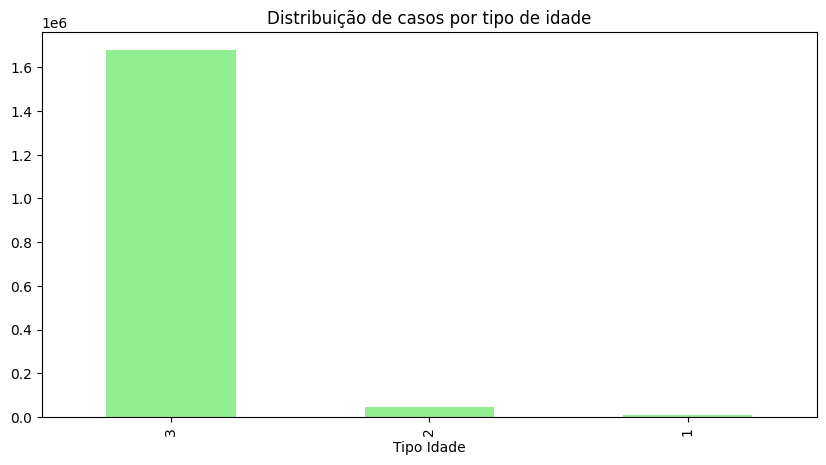

In [30]:
tipo_idade = df_2021_t['TP_IDADE'].value_counts()
plt.figure(figsize=(10, 5))
tipo_idade.plot(kind='bar', color='lightgreen')
plt.xlabel('Tipo Idade')
plt.title('Distribuição de casos por tipo de idade')
plt.show()

## Atualizando dados

In [31]:
nivel_escolaridade = {
    1: 'Sem escolaridade / Analfabeto',
    2: 'Fundamental 1º ciclo (1ª a 5ª série)',
    3: 'Fundamental 2º ciclo (6ª a 9ª série)',
    4: 'Superior',
    5: 'Não se aplica',
    9: 'Ignorado'
}

df_2021_t['CS_ESCOL_N'] = df_2021_t['CS_ESCOL_N'].replace(nivel_escolaridade)
df_2022_t['CS_ESCOL_N'] = df_2022_t['CS_ESCOL_N'].replace(nivel_escolaridade)
df_2023_t['CS_ESCOL_N'] = df_2023_t['CS_ESCOL_N'].replace(nivel_escolaridade)
df_2024_t['CS_ESCOL_N'] = df_2024_t['CS_ESCOL_N'].replace(nivel_escolaridade)

In [32]:
df_2021_t['CS_ESCOL_N'].unique()

array(['Ignorado', 'Não preenchido', 'Sem escolaridade / Analfabeto',
       'Não se aplica', 'Superior',
       'Fundamental 2º ciclo (6ª a 9ª série)', 0.0,
       'Fundamental 1º ciclo (1ª a 5ª série)'], dtype=object)

In [33]:
antiviral = {
    1: 'Oseltamivir',
    2: 'Zanamivir',
    3: 'Outro'
}

df_2021_t['TP_ANTIVIR'] = df_2021_t['TP_ANTIVIR'].replace(antiviral)
df_2022_t['TP_ANTIVIR'] = df_2022_t['TP_ANTIVIR'].replace(antiviral)
df_2023_t['TP_ANTIVIR'] = df_2023_t['TP_ANTIVIR'].replace(antiviral)
df_2024_t['TP_ANTIVIR'] = df_2024_t['TP_ANTIVIR'].replace(antiviral)

In [34]:
df_2021_t['TP_ANTIVIR'].unique()

array(['Não preenchido', 'Outro', 'Oseltamivir', 'Zanamivir'],
      dtype=object)

In [35]:
amostra_sorologica = {
    1: 'Sangue/plasma/soro',
    2: 'Outra',
    9: 'Ignorado'
}

df_2021_t['TP_AM_SOR'] = df_2021_t['TP_AM_SOR'].replace(amostra_sorologica)
df_2022_t['TP_AM_SOR'] = df_2022_t['TP_AM_SOR'].replace(amostra_sorologica)
df_2023_t['TP_AM_SOR'] = df_2023_t['TP_AM_SOR'].replace(amostra_sorologica)
df_2024_t['TP_AM_SOR'] = df_2024_t['TP_AM_SOR'].replace(amostra_sorologica)

In [36]:
df_2021_t['TP_AM_SOR'].unique()

array(['Não preenchido', 'Sangue/plasma/soro', 'Outra', 'Ignorado'],
      dtype=object)

In [37]:
criterio_confirmacao = {
    1: 'Laboratorial',
    2: 'Clínico Epidemiológico',
    3: 'Clínico',
    4: 'Clínico Imagem'
}

df_2021_t['CRITERIO'] = df_2021_t['CRITERIO'].replace(criterio_confirmacao)
df_2022_t['CRITERIO'] = df_2022_t['CRITERIO'].replace(criterio_confirmacao)
df_2023_t['CRITERIO'] = df_2023_t['CRITERIO'].replace(criterio_confirmacao)
df_2024_t['CRITERIO'] = df_2024_t['CRITERIO'].replace(criterio_confirmacao)

In [38]:
df_2021_t['CRITERIO'].unique()

array(['Laboratorial', 'Não preenchido', 'Clínico Imagem', 'Clínico',
       'Clínico Epidemiológico'], dtype=object)

In [39]:
idade_gestacional = {
    1: '1º Trimestre',
    2: '2º Trimestre',
    3: '3º Trimestre',
    4: 'Idade Gestacional Ignorada',
    5: 'Não',
    6: 'Não se aplica',
    9: 'Ignorado'
}

df_2021_t['CS_GESTANT'] = df_2021_t['CS_GESTANT'].replace(idade_gestacional)
df_2022_t['CS_GESTANT'] = df_2022_t['CS_GESTANT'].replace(idade_gestacional)
df_2023_t['CS_GESTANT'] = df_2023_t['CS_GESTANT'].replace(idade_gestacional)
df_2024_t['CS_GESTANT'] = df_2024_t['CS_GESTANT'].replace(idade_gestacional)

In [40]:
df_2021_t['CS_GESTANT'].unique()

array(['Não se aplica', 'Não', '3º Trimestre', 'Ignorado', '1º Trimestre',
       '2º Trimestre', 'Idade Gestacional Ignorada', 0], dtype=object)

In [41]:
cor_raca = {
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena',
    9: 'Ignorado'
}

df_2021_t['CS_RACA'] = df_2021_t['CS_RACA'].replace(cor_raca)
df_2022_t['CS_RACA'] = df_2022_t['CS_RACA'].replace(cor_raca)
df_2023_t['CS_RACA'] = df_2023_t['CS_RACA'].replace(cor_raca)
df_2024_t['CS_RACA'] = df_2024_t['CS_RACA'].replace(cor_raca)

In [42]:
df_2021_t['CS_RACA'].unique()

array(['Branca', 'Ignorado', 'Preta', 'Parda', 'Amarela', 'Indígena'],
      dtype=object)

In [43]:
evolucao_caso = {
    1: 'Cura',
    2: 'Óbito',
    3: 'Óbito por outras causas',
    9: 'Ignorado'
}

df_2021_t['EVOLUCAO'] = df_2021_t['EVOLUCAO'].replace(evolucao_caso)
df_2022_t['EVOLUCAO'] = df_2022_t['EVOLUCAO'].replace(evolucao_caso)
df_2023_t['EVOLUCAO'] = df_2023_t['EVOLUCAO'].replace(evolucao_caso)
df_2024_t['EVOLUCAO'] = df_2024_t['EVOLUCAO'].replace(evolucao_caso)

In [44]:
df_2021_t['EVOLUCAO'].unique()

array(['Óbito', 'Cura', 'Óbito por outras causas', 'Não preenchido',
       'Ignorado'], dtype=object)

In [45]:
resultado_pcr = {
    1: 'Detectável',
    2: 'Não Detectável',
    3: 'Inconclusivo',
    4: 'Não Realizado',
    5: 'Aguardando Resultado',
    9: 'Ignorado'
}

df_2021_t['PCR_RESUL'] = df_2021_t['PCR_RESUL'].replace(resultado_pcr)
df_2022_t['PCR_RESUL'] = df_2022_t['PCR_RESUL'].replace(resultado_pcr)
df_2023_t['PCR_RESUL'] = df_2023_t['PCR_RESUL'].replace(resultado_pcr)
df_2024_t['PCR_RESUL'] = df_2024_t['PCR_RESUL'].replace(resultado_pcr)

In [46]:
df_2021_t['PCR_RESUL'].unique()

array(['Não Detectável', 'Aguardando Resultado', 'Detectável',
       'Não preenchido', 'Não Realizado', 'Inconclusivo', 'Ignorado'],
      dtype=object)

In [47]:
teste_antigenico = {
    1: 'Imunofluorescência (IF)',
    2: 'Teste rápido antigênico'
}

df_2021_t['TP_TES_AN'] = df_2021_t['TP_TES_AN'].replace(teste_antigenico)
df_2022_t['TP_TES_AN'] = df_2022_t['TP_TES_AN'].replace(teste_antigenico)
df_2023_t['TP_TES_AN'] = df_2023_t['TP_TES_AN'].replace(teste_antigenico)
df_2024_t['TP_TES_AN'] = df_2024_t['TP_TES_AN'].replace(teste_antigenico)

In [48]:
df_2021_t['TP_TES_AN'].unique()

array(['Imunofluorescência (IF)', 'Não preenchido',
       'Teste rápido antigênico'], dtype=object)

In [49]:
tipo_influenza = {
    1: 'Influenza A',
    2: 'Influenza B'
}

df_2021_t['TP_FLU_PCR'] = df_2021_t['TP_FLU_PCR'].replace(tipo_influenza)
df_2021_t['TP_FLU_AN'] = df_2021_t['TP_FLU_AN'].replace(tipo_influenza)

df_2022_t['TP_FLU_PCR'] = df_2022_t['TP_FLU_PCR'].replace(tipo_influenza)
df_2022_t['TP_FLU_AN'] = df_2022_t['TP_FLU_AN'].replace(tipo_influenza)

df_2023_t['TP_FLU_PCR'] = df_2023_t['TP_FLU_PCR'].replace(tipo_influenza)
df_2023_t['TP_FLU_AN'] = df_2023_t['TP_FLU_AN'].replace(tipo_influenza)

df_2024_t['TP_FLU_PCR'] = df_2024_t['TP_FLU_PCR'].replace(tipo_influenza)
df_2024_t['TP_FLU_AN'] = df_2024_t['TP_FLU_AN'].replace(tipo_influenza)

In [50]:
df_2021_t['TP_FLU_PCR'].unique()

array(['Não preenchido', 'Influenza A', 'Influenza B'], dtype=object)

In [51]:
df_2021_t['TP_FLU_AN'].unique()

array(['Não preenchido', 'Influenza B', 'Influenza A'], dtype=object)

In [52]:
subtipo_influenza_A = {
    1: 'Influenza A (H1N1)pdm09',
    2: 'Influenza A (H3N2)',
    3: 'Influenza A não subtipado',
    4: 'Influenza A não subtipável',
    5: 'Inconclusivo',
    6: 'Outro'
}

df_2021_t['PCR_FLUASU'] = df_2021_t['PCR_FLUASU'].replace(subtipo_influenza_A)
df_2022_t['PCR_FLUASU'] = df_2022_t['PCR_FLUASU'].replace(subtipo_influenza_A)
df_2023_t['PCR_FLUASU'] = df_2023_t['PCR_FLUASU'].replace(subtipo_influenza_A)
df_2024_t['PCR_FLUASU'] = df_2024_t['PCR_FLUASU'].replace(subtipo_influenza_A)

In [53]:
df_2021_t['PCR_FLUASU'].unique()

array(['Não preenchido', 'Influenza A não subtipado', 'Outro',
       'Influenza A (H3N2)', 'Influenza A não subtipável',
       'Influenza A (H1N1)pdm09', 'Inconclusivo'], dtype=object)

In [54]:
sexo = {
    1: 'Masculino',
    2: 'Feminino',
    9: 'Ignorado'
}

df_2021_t['CS_SEXO'] = df_2021_t['CS_SEXO'].replace(sexo)
df_2022_t['CS_SEXO'] = df_2022_t['CS_SEXO'].replace(sexo)
df_2023_t['CS_SEXO'] = df_2023_t['CS_SEXO'].replace(sexo)
df_2024_t['CS_SEXO'] = df_2024_t['CS_SEXO'].replace(sexo)

In [55]:
df_2021_t['CS_SEXO'].unique()

array(['M', 'F', 'I'], dtype=object)

In [56]:
tipo_tratamento = {
    1: 'Nirmatrevir/ritonavir(Paxlovid ®)',
    2: 'Molnupiravir(Lagevrio®)',
    3: 'Baricitinibe (Olumiant®)',
    4: 'Outro'
}

df_2022_t['TIPO_TRAT'] = df_2022_t['TIPO_TRAT'].replace(tipo_tratamento)
df_2023_t['TIPO_TRAT'] = df_2023_t['TIPO_TRAT'].replace(tipo_tratamento)
df_2024_t['TIPO_TRAT'] = df_2024_t['TIPO_TRAT'].replace(tipo_tratamento)

In [57]:
df_2022_t['TIPO_TRAT'].unique()

array(['Não preenchido', 'Baricitinibe (Olumiant®)',
       'Molnupiravir(Lagevrio®)', 'Nirmatrevir/ritonavir(Paxlovid ®)'],
      dtype=object)

In [58]:
resultado_raiox = {
    1: 'Normal',
    2: 'Infiltrado intersticial',
    3: 'Consolidação',
    4: 'Misto',
    5: 'Outro',
    6: 'Não realizado',
    9: 'Ignorado'
}

df_2021_t['RAIOX_RES'] = df_2021_t['RAIOX_RES'].replace(resultado_raiox)
df_2022_t['RAIOX_RES'] = df_2022_t['RAIOX_RES'].replace(resultado_raiox)
df_2023_t['RAIOX_RES'] = df_2023_t['RAIOX_RES'].replace(resultado_raiox)
df_2024_t['RAIOX_RES'] = df_2024_t['RAIOX_RES'].replace(resultado_raiox)

In [59]:
df_2021_t['RAIOX_RES'].unique()

array(['Não preenchido', 'Não realizado', 'Ignorado',
       'Infiltrado intersticial', 'Misto', 'Normal', 'Consolidação',
       'Outro'], dtype=object)

In [60]:
resultado_teste_antigenico = {
    1: 'Positivo',
    2: 'Negativo',
    3: 'Inconclusivo',
    4: 'Não realizado',
    5: 'Aguardando resultado',
    9: 'Ignorado'
}

df_2021_t['RES_AN'] = df_2021_t['RES_AN'].replace(resultado_teste_antigenico)
df_2022_t['RES_AN'] = df_2022_t['RES_AN'].replace(resultado_teste_antigenico)
df_2023_t['RES_AN'] = df_2023_t['RES_AN'].replace(resultado_teste_antigenico)
df_2024_t['RES_AN'] = df_2024_t['RES_AN'].replace(resultado_teste_antigenico)

In [61]:
df_2021_t['RES_AN'].unique()

array(['Não realizado', 'Aguardando resultado', 'Não preenchido',
       'Positivo', 'Negativo', 'Ignorado', 'Inconclusivo'], dtype=object)

In [62]:
tipo_amostra = {
    1: 'Secreção de Nasoorofaringe',
    2: 'Lavado Broco-alveolar',
    3: 'Tecido post-mortem',
    4: 'Outra',
    5: 'LCR',
    9: 'Ignorado'
}

df_2021_t['TP_AMOSTRA'] = df_2021_t['TP_AMOSTRA'].replace(tipo_amostra)
df_2022_t['TP_AMOSTRA'] = df_2022_t['TP_AMOSTRA'].replace(tipo_amostra)
df_2023_t['TP_AMOSTRA'] = df_2023_t['TP_AMOSTRA'].replace(tipo_amostra)
df_2024_t['TP_AMOSTRA'] = df_2024_t['TP_AMOSTRA'].replace(tipo_amostra)

In [63]:
df_2021_t['TP_AMOSTRA'].unique()

array(['Secreção de Nasoorofaringe', 'Não preenchido', 'Outra',
       'Lavado Broco-alveolar', 'Ignorado', 'Tecido post-mortem', 'LCR'],
      dtype=object)

In [64]:
colunas = ['NOSOCOMIAL', 'AVE_SUINO', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'OUTRO_SIN', 'PUERPERA', 
           'FATOR_RISC', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 
           'OUT_MORBI', 'VACINA', 'MAE_VAC', 'M_AMAMENTA', 'ANTIVIRAL', 'HOSPITAL', 'UTI', 'AMOSTRA', 'POS_PCRFLU', 'POS_PCROUT', 'HISTO_VGM', 'DOR_ABD', 'FADIGA',
           'PERD_OLFT', 'PERD_PALA', 'POS_AN_FLU', 'POS_AN_OUT', 'VACINA_COV', 'TRAT_COV']

sim_nao = {
    1: 'Sim',
    2: 'Não',
    9: 'Ignorado',
    3: 'Não preenchido', # esses dois ultimos casos nao batem com a descricao das colunas, entao serao considerados cono nan
    0: 'Não preenchido'
}

In [65]:
for coluna in colunas:
    if coluna in df_2021_t.columns:
        df_2021_t[coluna] = df_2021_t[coluna].replace(sim_nao)
        print(df_2021_t[coluna].unique())

['Não preenchido' 'Não' 'Ignorado' 'Sim']
['Ignorado' 'Não preenchido' 'Não' 'Sim']
['Não' 'Não preenchido' 'Sim' 'Ignorado']
['Não' 'Não preenchido' 'Sim' 'Ignorado']
['Não' 'Não preenchido' 'Sim' 'Ignorado']
['Sim' 'Não' 'Não preenchido' 'Ignorado']
['Não' 'Sim' 'Não preenchido' 'Ignorado']
['Não' 'Sim' 'Não preenchido' 'Ignorado']
['Não' 'Não preenchido' 'Sim' 'Ignorado']
['Não' 'Não preenchido' 'Sim' 'Ignorado']
['Não preenchido' 'Não' 'Sim' 'Ignorado']
['Não preenchido' 'Não' 'Ignorado' 'Sim']
['Não' 'Sim']
['Não preenchido' 'Não' 'Sim' 'Ignorado']
['Não preenchido' 'Não' 'Sim' 'Ignorado']
['Não preenchido' 'Não' 'Sim' 'Ignorado']
['Não preenchido' 'Não' 'Sim' 'Ignorado']
['Não preenchido' 'Não' 'Sim' 'Ignorado']
['Não preenchido' 'Não' 'Sim' 'Ignorado']
['Não preenchido' 'Não' 'Sim' 'Ignorado']
['Não preenchido' 'Não' 'Sim' 'Ignorado']
['Não preenchido' 'Não' 'Ignorado' 'Sim']
['Não preenchido' 'Sim' 'Não' 'Ignorado']
['Não preenchido' 'Sim' 'Não' 'Ignorado']
['Não preenchido' 'S

In [66]:
for coluna in colunas:
    if coluna in df_2022_t.columns:
        df_2022_t[coluna] = df_2022_t[coluna].replace(sim_nao)

In [67]:
for coluna in colunas:
    if coluna in df_2023_t.columns:
        df_2023_t[coluna] = df_2023_t[coluna].replace(sim_nao)

In [68]:
for coluna in colunas:
    if coluna in df_2024_t.columns:
        df_2024_t[coluna] = df_2024_t[coluna].replace(sim_nao)

In [69]:
suporte_ventilatorio = {
    1: 'Sim, invasivo',
    2: 'Sim, não invasivo',
    3: 'Não',
    9: 'Ignorado'
}

df_2021_t['SUPORT_VEN'] = df_2021_t['SUPORT_VEN'].replace(suporte_ventilatorio)
df_2022_t['SUPORT_VEN'] = df_2022_t['SUPORT_VEN'].replace(suporte_ventilatorio)
df_2023_t['SUPORT_VEN'] = df_2023_t['SUPORT_VEN'].replace(suporte_ventilatorio)
df_2024_t['SUPORT_VEN'] = df_2024_t['SUPORT_VEN'].replace(suporte_ventilatorio)

In [70]:
df_2021_t['SUPORT_VEN'].unique()

array(['Ignorado', 'Não preenchido', 'Sim, não invasivo', 'Sim, invasivo',
       'Não'], dtype=object)

In [71]:
diagnostico_final = {
    1: 'SRAG por influenza',
    2: 'SRAG por outro vírus respiratório',
    3: 'SRAG por outro agente etiológico',
    4: 'SRAG não especificado',
    5: 'SRAG por covid-19'
}

df_2021_t['CLASSI_FIN'] = df_2021_t['CLASSI_FIN'].replace(diagnostico_final)
df_2022_t['CLASSI_FIN'] = df_2022_t['CLASSI_FIN'].replace(diagnostico_final)
df_2023_t['CLASSI_FIN'] = df_2023_t['CLASSI_FIN'].replace(diagnostico_final)
df_2024_t['CLASSI_FIN'] = df_2024_t['CLASSI_FIN'].replace(diagnostico_final)

In [72]:
df_2021_t['CLASSI_FIN'].unique()

array(['SRAG por outro agente etiológico', 'SRAG por covid-19',
       'SRAG não especificado', 'Não preenchido', 'SRAG por influenza',
       'SRAG por outro vírus respiratório'], dtype=object)

In [73]:
teste_sorologico = {
    1: 'Teste rápido',
    2: 'Elisa',
    3: 'Quimiluminescência',
    4: 'Outro'
}

df_2021_t['TP_SOR'] = df_2021_t['TP_SOR'].replace(teste_sorologico)
df_2022_t['TP_SOR'] = df_2022_t['TP_SOR'].replace(teste_sorologico)
df_2023_t['TP_SOR'] = df_2023_t['TP_SOR'].replace(teste_sorologico)
df_2024_t['TP_SOR'] = df_2024_t['TP_SOR'].replace(teste_sorologico)

In [74]:
df_2021_t['TP_SOR'].unique()

array(['Não preenchido', 'Teste rápido', 'Outro', 'Elisa',
       'Quimiluminescência'], dtype=object)

In [75]:
resultado_tomografia = {
    1: 'Tipico covid-19',
    2: 'Indeterminado covid-19',
    3: 'Atípico covid-19',
    4: 'Negativo para Pneumonia',
    5: 'Outro',
    6: 'Não realizado',
    9: 'Ignorado'
}

df_2021_t['TOMO_RES'] = df_2021_t['TOMO_RES'].replace(resultado_tomografia)
df_2022_t['TOMO_RES'] = df_2022_t['TOMO_RES'].replace(resultado_tomografia)
df_2023_t['TOMO_RES'] = df_2023_t['TOMO_RES'].replace(resultado_tomografia)
df_2024_t['TOMO_RES'] = df_2024_t['TOMO_RES'].replace(resultado_tomografia)

In [76]:
df_2021_t['TOMO_RES'].unique()

array(['Ignorado', 'Tipico covid-19', 'Não preenchido', 'Não realizado',
       'Atípico covid-19', 'Outro', 'Negativo para Pneumonia',
       'Indeterminado covid-19'], dtype=object)

In [77]:
zona = {
    1: 'Urbana',
    2: 'Rural',
    3: 'Periurbana',
    9: 'Ignorado'
}

df_2021_t['CS_ZONA'] = df_2021_t['CS_ZONA'].replace(zona)
df_2022_t['CS_ZONA'] = df_2022_t['CS_ZONA'].replace(zona)
df_2023_t['CS_ZONA'] = df_2023_t['CS_ZONA'].replace(zona)
df_2024_t['CS_ZONA'] = df_2024_t['CS_ZONA'].replace(zona)

In [78]:
df_2021_t['CS_ZONA'].unique()

array(['Urbana', 'Não preenchido', 'Periurbana', 'Rural', 'Ignorado'],
      dtype=object)

In [79]:
linhagem_influenza_B = {
    1: 'Victoria',
    2: 'Yamagatha',
    3: 'Não realizado',
    4: 'Inconclusivo',
    5: 'Outro'
}

df_2021_t['PCR_FLUBLI'] = df_2021_t['PCR_FLUBLI'].replace(linhagem_influenza_B)
df_2022_t['PCR_FLUBLI'] = df_2022_t['PCR_FLUBLI'].replace(linhagem_influenza_B)
df_2023_t['PCR_FLUBLI'] = df_2023_t['PCR_FLUBLI'].replace(linhagem_influenza_B)
df_2024_t['PCR_FLUBLI'] = df_2024_t['PCR_FLUBLI'].replace(linhagem_influenza_B)

In [80]:
df_2021_t['PCR_FLUBLI'].unique()

array(['Não preenchido', 'Não realizado', 'Inconclusivo', 'Yamagatha',
       'Outro'], dtype=object)

In [81]:
idade = {
    1: 'Dia',
    2: 'Mês',
    3: 'Ano'
}

df_2021_t['TP_IDADE'] = df_2021_t['TP_IDADE'].replace(idade)
df_2022_t['TP_IDADE'] = df_2022_t['TP_IDADE'].replace(idade)
df_2023_t['TP_IDADE'] = df_2023_t['TP_IDADE'].replace(idade)
df_2024_t['TP_IDADE'] = df_2024_t['TP_IDADE'].replace(idade)

In [82]:
df_2021_t['TP_IDADE'].unique()

array(['Ano', 'Mês', 'Dia'], dtype=object)

## Viualização dos dados após atualização

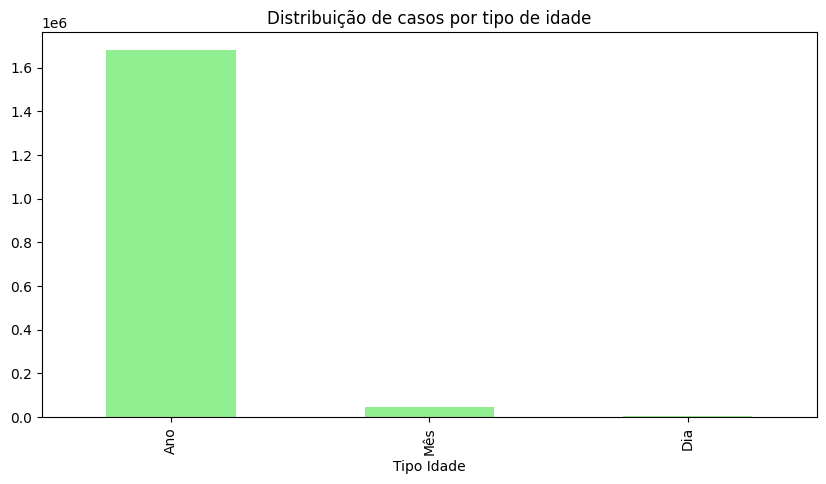

In [83]:
tipo_idade = df_2021_t['TP_IDADE'].value_counts()
plt.figure(figsize=(10, 5))
tipo_idade.plot(kind='bar', color='lightgreen')
plt.xlabel('Tipo Idade')
plt.title('Distribuição de casos por tipo de idade')
plt.show()

# Gráficos e análises

## Comparativo entre Semana Epidemiológica do início dos sintomas e Semana Epidemiológica do preenchimento da ficha de notificação

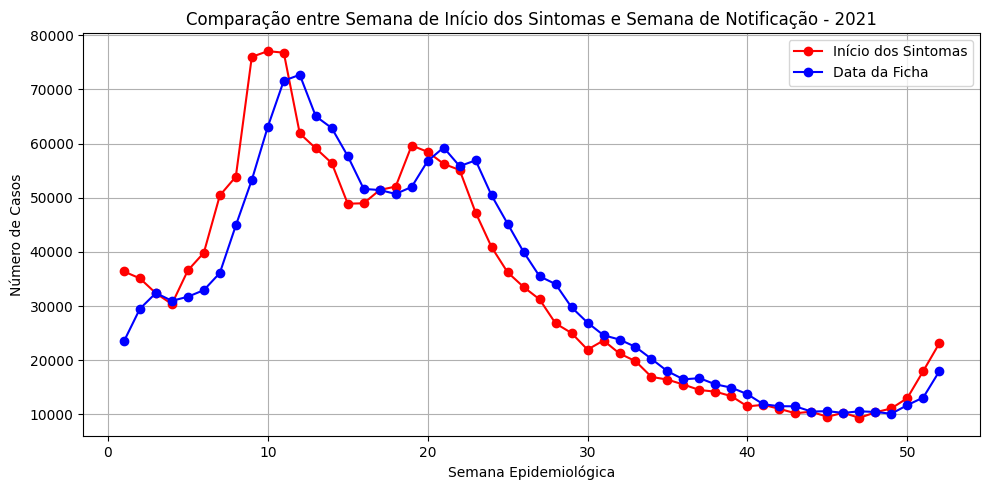

Em 2021, a média de atraso entre o início dos sintomas e a notificação é de 0.7959983387543315 semanas.


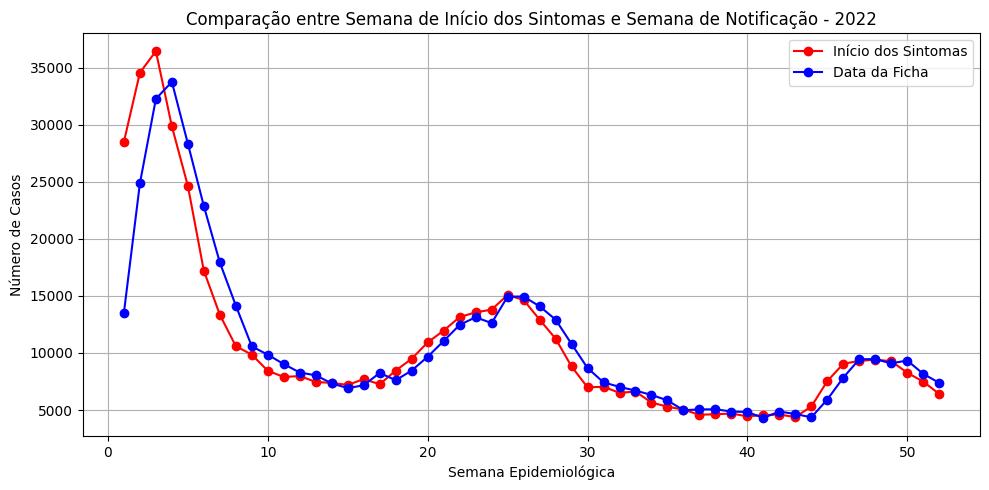

Em 2022, a média de atraso entre o início dos sintomas e a notificação é de 0.5312470848253048 semanas.


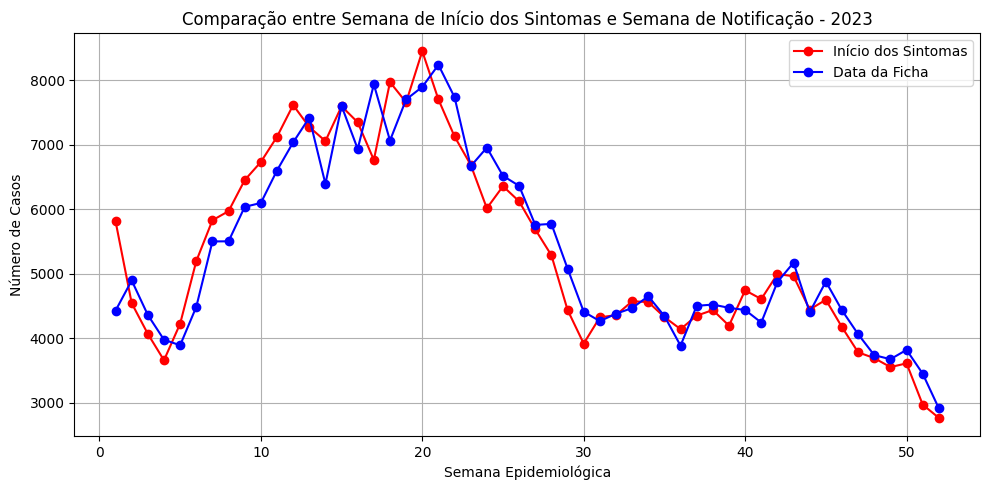

Em 2023, a média de atraso entre o início dos sintomas e a notificação é de 0.4481286145042684 semanas.


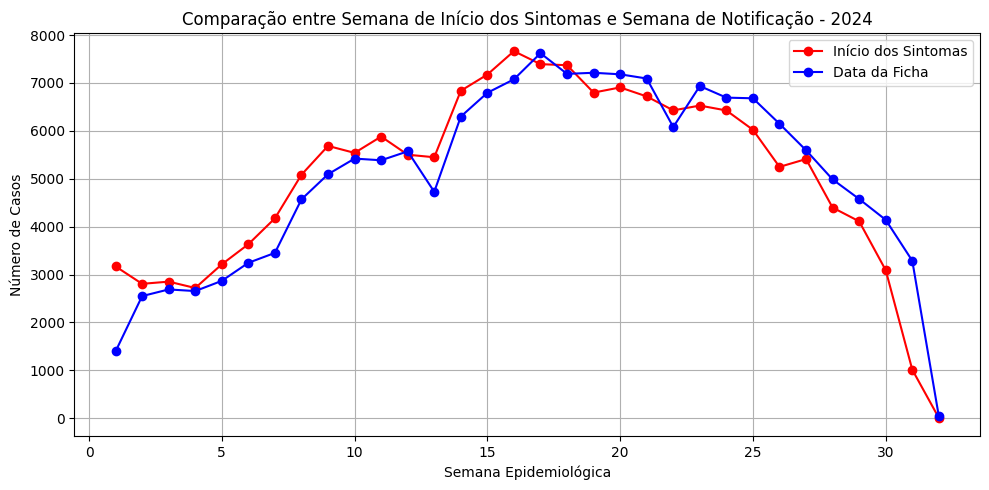

Em 2024, a média de atraso entre o início dos sintomas e a notificação é de 0.9206923067382703 semanas.


In [95]:
anos = ['2021', '2022', '2023', '2024']

for ano in anos:
    df = globals()[f'df_{ano}_t']
    
    # Calcula a contagem de casos por semana epidemiológica
    semana_sintomas = df['SEM_PRI'].value_counts().sort_index()
    semana_ficha = df['SEM_NOT'].value_counts().sort_index()

    # Criação do gráfico
    plt.figure(figsize=(10, 5))
    plt.plot(semana_sintomas.index, semana_sintomas.values, label='Início dos Sintomas', color='red', marker='o')
    plt.plot(semana_ficha.index, semana_ficha.values, label='Data da Ficha', color='blue', marker='o')

    plt.xlabel('Semana Epidemiológica')
    plt.ylabel('Número de Casos')
    plt.title(f'Comparação entre Semana de Início dos Sintomas e Semana de Notificação - {ano}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Ajusta o layout para evitar cortes
    plt.show()

    df['diferença_semanas'] = df['SEM_NOT'] - df['SEM_PRI']
    media_diferenca = df['diferença_semanas'].mean()
    print(f"Em {ano}, a média de atraso entre o início dos sintomas e a notificação é de {media_diferenca} semanas.")

Com esses gráficos a ideia é analisar se as pessoas demoraram a buscar auxilio médico, podemos perceber que a linha azul (preenchimento da ficha) está deslocada para a direita quando comparada com a linha vermelha (primeiros sintomas), indicando que existe sim esse atraso.

Um ponto interessante também para se analisar é a respeito dos números de casos (eixo y), o gráfico de 2021 possui um número de casos acima de 70.000 e o de 2022 possui casos acima de 35.000. Além disso, calculei a média de atraso entre o início dos sintomas e a ficha de notificação e foi possível observar que essas médias foram menores nos anos de 2022 e 2023 o que possivelmente foi causado por uma maior conscientização da população